In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
%matplotlib inline

In [9]:
out_pred = pd.read_csv("out_preds.csv").values
out_gt = pd.read_csv("out_gt.csv").values

In [10]:
out_pred.shape

(24388, 14)

In [11]:
CLASSES = 14

In [12]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(CLASSES):
    fpr[i], tpr[i], _ = roc_curve(out_gt[:, i], out_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [99]:
import matplotlib.cm as cm
x = np.arange(CLASSES)
ys = [i+x+(i*x)**2 for i in range((CLASSES))]
colors = cm.hot(np.linspace(0, 1, len(ys)))

In [101]:
import random
linestyles = ['-', '--', '-.',
              (0, (1, 5)), (0, (1, 1))]
# random.choice(linestyles)

In [93]:
set_labels =['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema',
                 'Fibrosis','Hernia', 'Infiltration', 'Mass', 'Nodule', 'Pleural_Thickening',
                 'Pneumonia','Pneumothorax']

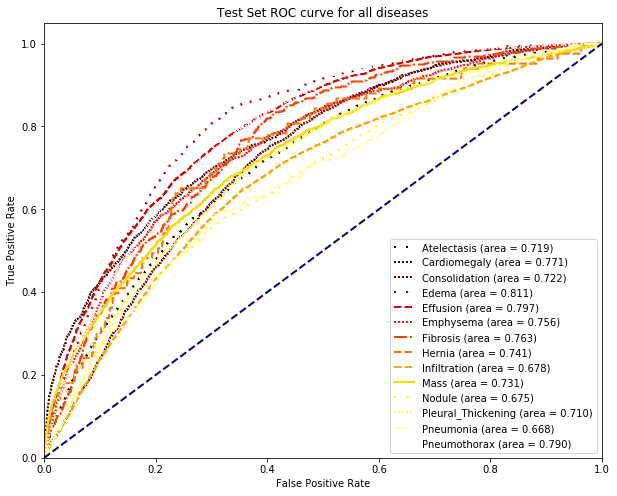

In [102]:
plt.rcParams['figure.figsize'] = [10,8]
plt.figure()
lw = 2
for i,c in zip(range(CLASSES), colors):
#     print ('ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot(fpr[i], tpr[i], color=c,
             lw=lw, label='%s (area = %0.3f)' %(set_labels[i],roc_auc[i]),
             linestyle=random.choice(linestyles) )
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Set ROC curve for all diseases')
plt.legend(loc="lower right")
plt.show()